In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, csr_matrix

from lightfm import LightFM

In [88]:
data = pd.read_parquet('data/data.pq')
pairs = pd.read_csv('data/pairs/pairs.csv', usecols=['ind','lat','lon'])

In [89]:
cdata = data.groupby('ind').agg({'culttype': 'max', 'soiltype': 'max', 'covertype': 'max'}).reset_index()

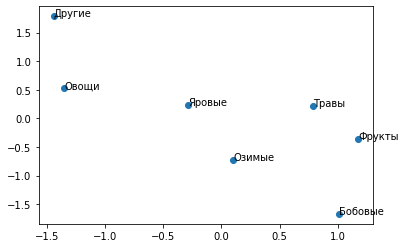

In [123]:
mx = coo_matrix(pd.get_dummies(cdata.culttype))

model = LightFM(no_components=3)
model.fit(mx)
cult_emb = model.item_embeddings

projection = pd.get_dummies(cdata.culttype).drop_duplicates().to_numpy() @ cult_emb
projection -= projection.mean(0)
projection /= projection.std(0)

plt.scatter(projection[:,0], projection[:,1])

for i,text in enumerate(data[['culttype', 'type']].drop_duplicates().type.values):
    plt.annotate(text, (projection[i,0], projection[i,1]))
plt.show()

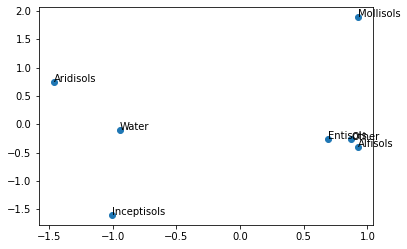

In [128]:
mx = coo_matrix(pd.get_dummies(cdata.soiltype))

model = LightFM(no_components=3)
model.fit(mx)
soil_emb = model.item_embeddings

projection = pd.get_dummies(cdata.soiltype).drop_duplicates().to_numpy() @ soil_emb
projection -= projection.mean(0)
projection /= projection.std(0)

plt.scatter(projection[:,0], projection[:,1])

for i,text in enumerate(data[['soiltype', 'soil_label']].drop_duplicates().soil_label.values):
    plt.annotate(text, (projection[i,0], projection[i,1]))
plt.show()

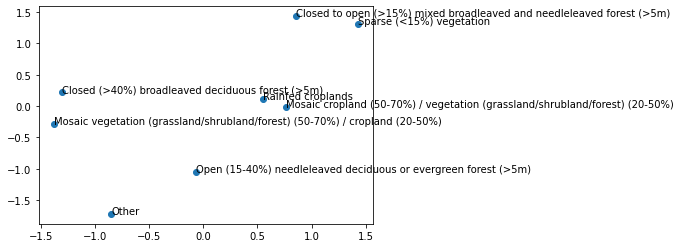

In [129]:
mx = coo_matrix(pd.get_dummies(cdata.covertype))

model = LightFM(no_components=4)
model.fit(mx)
cover_emb = model.item_embeddings

projection = pd.get_dummies(cdata.covertype).drop_duplicates().to_numpy() @ cover_emb
projection -= projection.mean(0)
projection /= projection.std(0)

plt.scatter(projection[:,0], projection[:,1])

for i,text in enumerate(data[['covertype', 'cover_name']].drop_duplicates().cover_name.values):
    plt.annotate(text, (projection[i,0], projection[i,1]))
plt.show()

In [131]:
np.savez_compressed('data/embeddings.npz', cult_emb=cult_emb, soil_emb=soil_emb, cover_emb=cover_emb)

In [94]:
cult = pd.read_csv('data/agro/cult.csv', sep=';')
cult_df = data.groupby('kult').agg({'culttype': 'max'}).reset_index()
cult_ftr = csr_matrix(cult_df.join(pd.get_dummies(cult_df.kult)).drop('kult', axis=1).groupby('culttype').sum().to_numpy())

In [95]:
mx = coo_matrix(pd.get_dummies(cdata.culttype))

model = LightFM(no_components=3)
model.fit(mx, item_features=cult_ftr)
cult_emb = model.item_embeddings

In [96]:
projection2 = cult_ftr @ cult_emb
projection2 -= projection2.mean(0)
projection2 /= projection2.std(0)

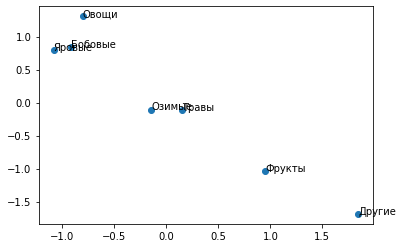

In [101]:
plt.scatter(projection[:,0], projection[:,1])
#plt.scatter(projection2[:,0], projection2[:,1])

for i,text in enumerate(data[['culttype', 'type']].drop_duplicates().type.values):
    #plt.annotate(text, (projection2[i,0], projection2[i,1]))
    plt.annotate(text, (projection[i,0], projection[i,1]))
plt.show()